# Experience : Surconsommation de Nourriture Hyperpalatable

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
# Ajouter le dossier src au chemin d'importation
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
import matplotlib.pyplot as plt
import torch 
import numpy as np

In [4]:
from environments.extreme_deviation_env import ExtremeDeviationEnvironment
from models.qlearning import QLearning

### Configuration de l'environnement

In [5]:
# Paramètres de l'environnement
initial_state = torch.tensor([30])  # État interne initial
setpoints = torch.tensor([0])  # État optimal
weights = torch.tensor([0.08])  # Poids pour les états internes
exponents = [4, 3]  # Exposants pour le calcul du drive
effects = {0: -1, 1: 1}  # Effets des actions : 0 = diminuer, 1 = augmenter

# Instanciation de l'environnement
env = ExtremeDeviationEnvironment(
    H=initial_state,
    setpoints=setpoints,
    weights=weights,
    exponents=exponents,
    effects=effects,
)

### Configuration de l'agent

In [6]:
state_size = 1  # Taille des états discrétisés 
action_size = len(effects)  # Nombre d'actions possibles (0 et 1)
alpha = 0.4  # Taux d'apprentissage
gamma = 0.9  # Facteur d'actualisation
epsilon = 0.05  # Exploration-exploitation

q_table = {
    0: np.zeros(2), # Un seul etats : deux actions : diminuer et augementer l'etats interne
}

# Initialisation de l'agent
agent = QLearning(state_size=state_size, action_size=action_size, alpha=alpha, gamma=gamma, epsilon=epsilon, q_table=q_table)

### Entraînement du modèle

In [7]:
count_internal_states = {}

agent.reset()
state = env.reset()
state_idx = int(state)
total_reward = 0
done = False    
internal_states = []

steps = 100_000
for _ in range(0,steps): 
    # Choisir une action
    action = agent.choose_action(state)

    # Effectuer une étape
    next_state, reward, done, _ = env.step(action)
    next_state_idx = int(next_state)

    # Mettre à jour la table Q
    agent.update_q_value(state_idx, action, reward, next_state_idx)

    # Passer à l'état suivant
    state_idx = next_state_idx
    total_reward += reward

    internal_states.append(env.state)

    if int(env.state) not in count_internal_states:
        count_internal_states[int(env.state)] = 0
    else:
        count_internal_states[int(env.state)] += 1
    # print(f"etats interne : {env.state}, reward : {reward}")


KeyboardInterrupt: 

### (A) The number of visits at each internal state after 10e6 trials

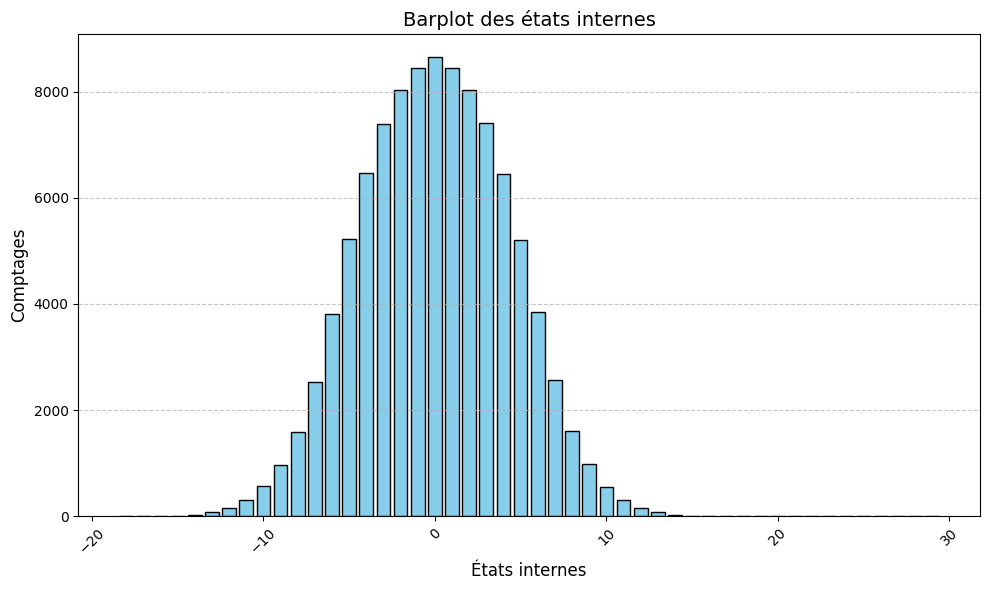

In [443]:
# Extraction des clés et des valeurs
keys = list(count_internal_states.keys())
values = list(count_internal_states.values())

# Création du barplot
plt.figure(figsize=(10, 6))  # Taille du graphique
plt.bar(keys, values, color='skyblue', edgecolor='black')  # Barres colorées avec bordures noires
plt.title("Barplot des états internes", fontsize=14)
plt.xlabel("États internes", fontsize=12)
plt.ylabel("Comptages", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotation des étiquettes pour plus de lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout de lignes de grille sur l'axe Y
plt.tight_layout()
plt.show()

### (B) The drive function in the one-dimensional homeostatic space. (setpoint = 0). 

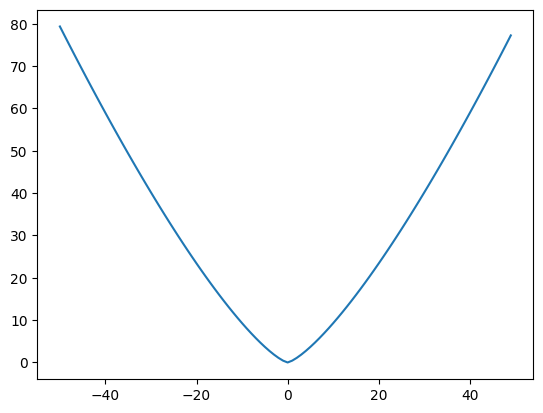

In [ ]:
internal_states = range(-50,50) 
drive = [env.drive.get_drive(state) for state in internal_states] 
plt.plot(internal_states,drive)
plt.show()

In [8]:
nb_agents = int(10e2)
internal_states_agents = []

for n_agent in range(0,nb_agents):
    agent.reset()
    state = env.reset()
    state_idx = int(state)
    total_reward = 0
    internal_states = []
    
    steps = 1500
    for _ in range(0,steps): 
        # Choisir une action
        action = agent.choose_action(state)

        # Effectuer une étape
        next_state, reward, done, _ = env.step(action)
        next_state_idx = int(next_state)

        # Mettre à jour la table Q
        agent.update_q_value(state_idx, action, reward, next_state_idx)

        # Passer à l'état suivant
        state_idx = next_state_idx
        total_reward += reward

        internal_states.append(env.state.clone()) 
    internal_states_agents.append(internal_states)

    print(f"agent {n_agent}, Récompense totale = {total_reward}")

agent 0, Récompense totale = 39.0802104473114
agent 1, Récompense totale = 40.165977478027344
agent 2, Récompense totale = 35.46813631057739
agent 3, Récompense totale = 33.2717866897583
agent 4, Récompense totale = 37.430016040802
agent 5, Récompense totale = 39.0802104473114
agent 6, Récompense totale = 37.430016040802
agent 7, Récompense totale = 35.46813631057739
agent 8, Récompense totale = 39.0802104473114
agent 9, Récompense totale = 39.0802104473114
agent 10, Récompense totale = 35.46813631057739
agent 11, Récompense totale = 39.0802104473114
agent 12, Récompense totale = 35.46813631057739
agent 13, Récompense totale = 39.0802104473114
agent 14, Récompense totale = 39.0802104473114
agent 15, Récompense totale = 39.0802104473114
agent 16, Récompense totale = 37.430016040802
agent 17, Récompense totale = 39.0802104473114
agent 18, Récompense totale = 39.0802104473114
agent 19, Récompense totale = 40.165977478027344
agent 20, Récompense totale = 37.430016040802
agent 21, Récompens

### The mean (C) and standard deviation (D) of the internal state of 105 agents, along 1500 trials.

In [ ]:
mean_internal_states_agents = np.mean(internal_states_agents,axis=0)

In [ ]:
std_mean_internal_states_agents = np.std(internal_states_agents,axis=0)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(0,len(internal_states_agents[0])),mean_internal_states_agents)
# plt.title("mean internal states")
plt.xlabel("trial")
plt.ylabel("mean of internal state")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(0,len(internal_states_agents[0])),std_mean_internal_states_agents)
# plt.title("std internal states")
plt.xlabel("trial")
plt.ylabel("STD of internal state")
plt.legend()
plt.show()